In [1]:
import numpy as np
import os
from os import path
import matplotlib.pyplot as plt
import sys
import scipy
from scipy.signal import find_peaks, peak_prominences, find_peaks_cwt, peak_widths
data_loc = '/project/wyin/jlee/ml-project/inverse-shifted/data'
util_loc = '/project/wyin/jlee/ml-project/utils'
sys.path.append(util_loc)

from utilities import UnscaledData

In [2]:
#Ratio of prominence of peaks to maximum of spectral function
data = UnscaledData(data_loc, X_name = 'dos', y_name = 'params')

def max_proms(dataset):
    first_peak = 1000
    second_peak = 1000
    ind = 0
    for i, dos in enumerate(dataset):
        peaks, _ = find_peaks(dos)
        proms = peak_prominences(dos, peaks)[0]
        proms = sorted(proms, reverse = True)
        proms /= np.max(dos)
        
        if proms[1] < second_peak:
            ind = i
            
        first_peak = min(proms[0], first_peak)
        second_peak = min(proms[1], second_peak)
        
    print(f"first peak: {first_peak}, second peak: {second_peak}, index: {ind}")
    
max_proms(data.train_X)
max_proms(data.val_X)
max_proms(data.test_X)

first peak: 1.0, second peak: 0.06148016867322626, index: 1088
first peak: 1.0, second peak: 0.0736213440500112, index: 2552
first peak: 1.0, second peak: 0.06397153945666224, index: 2098


In [3]:
#histogram of all peak prominences * peak widths, hopefully to remove noise
def prom_hist(dataset):
    areas = []
    all_widths = []
    heights = []
    for dos in dataset:
        peaks, _ = find_peaks(dos)
        proms = peak_prominences(dos, peaks)
        widths = peak_widths(dos, peaks, prominence_data = proms)
        area = (proms[0] * widths[0]) / np.sum(dos)
        all_widths.extend(widths[0])
        heights.extend(proms[0])
        areas.extend(area)
        
        
    return areas, heights, all_widths

areas, heights, widths = prom_hist(data.train_X)

(array([13886.,  7226.,  5060.,  3639.,  2870.,  2267.,  1777.,  1509.,
         1376.,  1216.,  1109.,   970.,   971.,   830.,   788.,   701.,
          674.,   658.,   595.,   542.,   515.,   527.,   488.,   450.,
          408.,   391.,   366.,   371.,   368.,   321.,   328.,   325.,
          296.,   261.,   276.,   250.,   217.,   234.,   238.,   205.,
          202.,   189.,   209.,   163.,   177.,   175.,   174.,   198.,
          175.,   179.,   129.,   148.,   144.,   139.,   149.,   129.,
          122.,   124.,   131.,   128.,   126.,    90.,   139.,    99.,
          102.,    92.,    95.,    85.,    82.,    93.,    92.,    94.,
           87.,    88.,    86.,    87.,    80.,    79.,    90.,    77.,
           64.,    57.,    81.,    78.,    75.,    78.,    70.,    58.,
           74.,    66.,    68.,    65.,    62.,    39.,    63.,    63.,
           43.,    72.,    66.]),
 array([0.0e+00, 1.0e-05, 2.0e-05, 3.0e-05, 4.0e-05, 5.0e-05, 6.0e-05,
        7.0e-05, 8.0e-05, 9.0e-

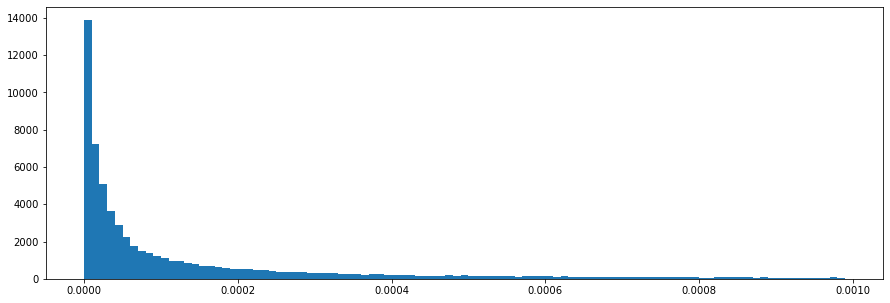

In [150]:
plt.figure(figsize = (15, 5))
plt.hist(areas, bins = np.arange(0, 0.001, 0.00001))

[0.00806 0.00945 0.00132 0.16363 0.01006]


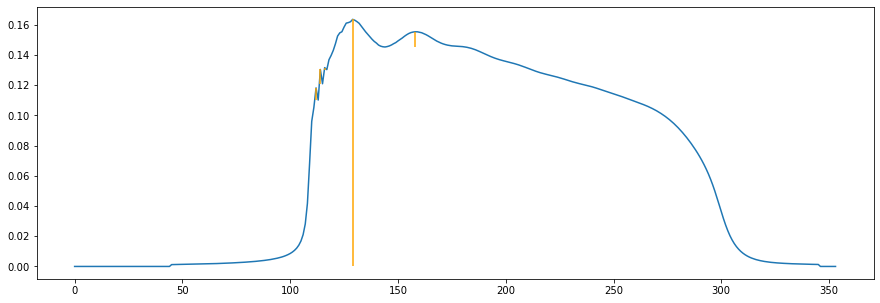

In [297]:
dos = data.train_X[1088]

peaks, _ = find_peaks(dos)
proms = peak_prominences(dos, peaks)[0]
#proms = sorted(proms, reverse = True)
#proms /= np.max(dos)

print(proms)

plt.figure(figsize = (15, 5))
plt.plot(dos)

bottoms = dos[peaks] - proms
plt.vlines(peaks, ymin=bottoms, ymax = dos[peaks], color = "orange")

[0.21046182 0.07627009 0.04607929 0.01741811 0.01090397 0.00049527]


(array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 ,

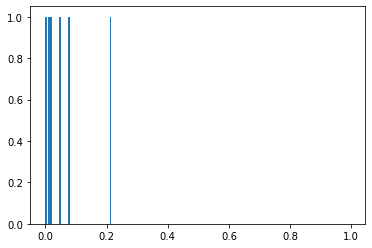

In [152]:
print(areas)
plt.hist(areas, np.arange(0, 1.0, 0.005))

In [216]:
#Ratio of prominence of peaks to maximum of spectral function
#Position of second largest prominences

def first_to_second(dataset):
    all_proms = []
    all_peaks = []
    mn_ratio = 1000
    mn_index = 0
    for i, dos in enumerate(dataset):
        peaks, _ = find_peaks(dos)
        proms = peak_prominences(dos, peaks)[0]
        proms /= np.max(dos)
        pairs = zip(proms, peaks)
        pairs = sorted(pairs, key = lambda x: x[0], reverse = True)
        
        first_prom, first_peak = pairs[0]
        second_prom, second_peak = (0, 0)
        for prom, peak in pairs[1:]:
            
            if peak > first_peak and prom > second_prom:
                second_prom = prom
                second_peak = peak
            
        for prom, peak in pairs:
            
            if first_peak < peak < second_peak:
                if second_prom / prom > mn_ratio:
                    mn_ratio = second_prom / prom
                    mn_index = i
                    
        all_proms.append(second_prom)
    
    return all_peaks, all_proms, mn_ratio, mn_index
                
        
    #return firsts, seconds
    
peaks, proms, ratio, index = first_to_second(data.train_X)
# first_to_second(data.val_X)
# first_to_second(data.test_X)
print(len(peaks))

0


31903.999999990232
9137


(array([ 358., 1839., 5746., 8154., 4607., 2461., 1294.,  685.,  302.,
          88.]),
 array([0.06148017, 0.12794214, 0.19440412, 0.26086609, 0.32732807,
        0.39379005, 0.46025202, 0.526714  , 0.59317597, 0.65963795,
        0.72609992]),
 <BarContainer object of 10 artists>)

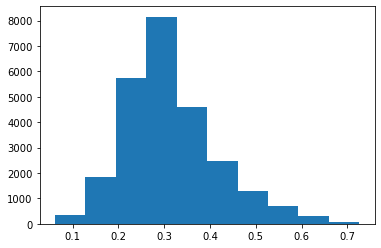

In [217]:
print(ratio)
print(index)
plt.hist(proms)

In [3]:
root = '/project/wyin/jlee/ml-project'
data_loc = path.join(root, 'inverse-shifted/data')

train_set = np.load(path.join(data_loc, "train-set.npz"))
print(train_set['dos'].shape)

val_set = np.load(path.join(data_loc, "val-set.npz"))
print(val_set['dos'].shape)

test_set = np.load(path.join(data_loc, "test-set.npz"))
print(test_set['dos'].shape)

print(test_set['params'][0])

all_dos = np.zeros((25, 25, 51, 354))

def load_dos(dataset):
    params_arr = dataset['params']
    dos_arr = dataset['dos']
    
    for i, params in enumerate(params_arr):
        t1_ind = round((params[0] + 0.5) * 50)
        t2_ind = round((params[1] - 0.02) * 50)
        j_ind = round((params[2] - 0.2) * 62.5)
        
        all_dos[t1_ind, t2_ind, j_ind] = dos_arr[i]
        
        if (i % 10000) == 0:
            print(i)
            
load_dos(train_set)
load_dos(val_set)
load_dos(test_set)

(25534, 354)
(3103, 354)
(3238, 354)
[-0.06   0.24   0.376]
0
10000
20000
0
0


In [4]:
#Truncate spectral function using minimum between 1st and 2nd prominent peaks
#Returns locations of first and second peaks
def mn_loc(dos):
    peaks, _ = find_peaks(dos)
    proms = peak_prominences(dos, peaks)[0]
    pairs = zip(proms, peaks)
    pairs = sorted(pairs, key = lambda x: x[0], reverse = True)

    first_prom, first_peak = pairs[0]
    second_prom, second_peak = (0, 0)
    for prom, peak in pairs[1:]:

        if peak > first_peak and prom > second_prom:
            second_prom = prom
            second_peak = peak
            
    mn = np.argmin(dos[first_peak:second_peak])
    
    return first_peak + mn

In [5]:
#Try fitting lorentzian
def lorentzian(x, x0, amp, width):
    return amp * width ** 2 / ((x - x0) ** 2 + width ** 2)

def gaussian(x, x0, amp, sigma):
    return amp*(np.exp((-1.0/2.0)*(((x-x0)/sigma)**2)))

def fit_lorentzian(dos):
    cutoff = mn_loc(dos)
    truncated_dos = dos[:cutoff + 1]
    truncated_omega = omega[:cutoff + 1]
    params, _ = scipy.optimize.curve_fit(lorentzian, truncated_omega, truncated_dos)

#     plt.figure(figsize = (15, 5))
#     plt.plot(truncated_omega, lorentzian(truncated_omega, *params))
#     plt.plot(truncated_omega, truncated_dos)
    
    return params
def fit_gaussian(dos):
    cutoff = mn_loc(dos)
    truncated_dos = dos[:cutoff + 1]
    truncated_omega = omega[:cutoff + 1]
    params, _ = scipy.optimize.curve_fit(gaussian, truncated_omega, truncated_dos)

    plt.figure(figsize = (15, 5))
    plt.plot(truncated_omega, lorentzian(truncated_omega, *params))
    plt.plot(truncated_omega, truncated_dos)
    
def fit_params(t1, t2, j):
    t1_ind = round((t1 + 0.5) * 50)
    t2_ind = round((t2 - 0.02) * 50)
    j_ind = round((j - 0.2) * 62.5)
    dos = all_dos[t1_ind, t2_ind, j_ind]
    params = fit_lorentzian(dos)
    #plt.plot(omega, dos)
    
    return params
    
omega = np.linspace(-4.36, 9.76, 354)
fit_params(-0.02, 0.04, 0.2)

NameError: name 'all_dos' is not defined

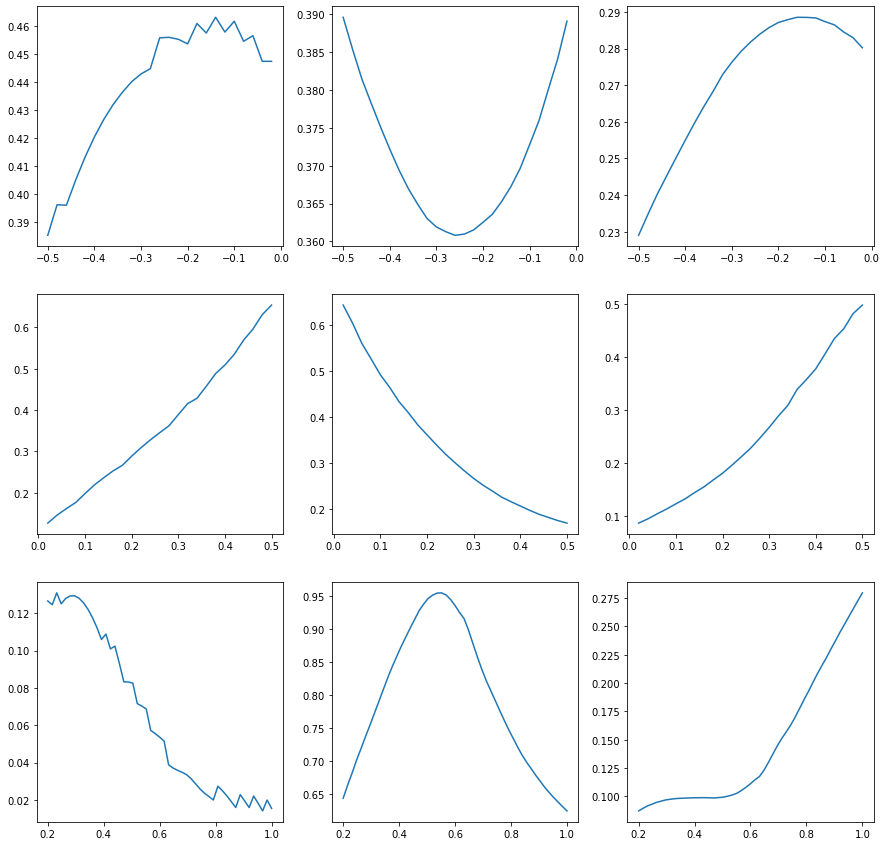

In [20]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
lor_arr_t1 = []
lor_arr_t2 = []
lor_arr_j = []

for i in range(25):
    x0, amp, width = fit_lorentzian(all_dos[i, 10, 6])
    lor_arr_t1.append([x0, amp, width])

lor_arr_t1 = np.array(lor_arr_t1)

for i in range(3):
    ax[0][i].plot(np.linspace(-0.5, -0.02, 25), np.abs(lor_arr_t1[:,i]))
    
for i in range(25):
    x0, amp, width = fit_lorentzian(all_dos[0, i, 0])
    lor_arr_t2.append([x0, amp, width])

lor_arr_t2 = np.array(lor_arr_t2)

for i in range(3):
    ax[1][i].plot(np.linspace(0.02, 0.50, 25), np.abs(lor_arr_t2[:,i]))
    
for i in range(51):
    x0, amp, width = fit_lorentzian(all_dos[0, 0, i])
    lor_arr_j.append([x0, amp, width])

lor_arr_j = np.array(lor_arr_j)

for i in range(3):
    ax[2][i].plot(np.linspace(0.20, 1.0, 51), np.abs(lor_arr_j[:,i]))
    

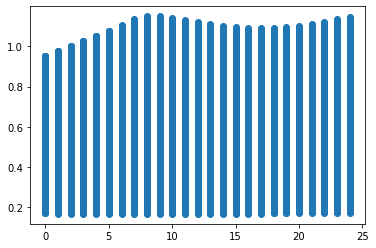

In [360]:
plt.scatter(t1_arr, x0_arr)